In [109]:
import requests
import pandas as pd
import bokeh
import numpy as np
from bokeh.io import output_file, show
from bokeh.layouts import layout
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, FactorRange,CustomJS, RadioGroup,Row,BoxAnnotation,Toggle

%matplotlib inline

In [75]:
def function(data):
    return data.Weight.sum()



def deal_with_outlirers(data):
    Q1 = data.quantile(q=0.25)
    Q3 = data.quantile(q=0.75)
    IRQ = Q3 - Q1
    #
    Q_LOW = Q1 - (1.5 * IRQ)
    Q_HIGH = Q3 + (1.5 * IRQ)
   
    data=data.loc[(data > Q_LOW) & (data < Q_HIGH)]

    return data

In [76]:
# GET DATA
url = 'https://camparator.com/compare/cam/'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]
df.to_csv('../data/CAMS_DATA.csv')


In [77]:
df

,Unnamed: 0,Name,Generation,Brand,Entity,Size,Color,Axle,Lobes,Weight,Strength (kN),Lower (mm),Upper (mm),Range (mm),Unnamed: 14
0,NaN,Black Diamond Camalot C3 000,Current,Black Diamond,Camalot C3,000,Gray,Single,3,55.0,4.0,7.80,12.90,5.10,NaN
1,NaN,Black Diamond Camalot C3 00,Current,Black Diamond,Camalot C3,00,Purple,Single,3,57.0,6.0,9.00,13.70,4.70,NaN
2,NaN,Black Diamond Camalot C3 0,Current,Black Diamond,Camalot C3,0,Green,Single,3,59.0,7.0,10.70,15.80,5.10,NaN
3,NaN,Black Diamond Camalot C3 1,Current,Black Diamond,Camalot C3,1,Red,Single,3,62.0,10.0,12.00,18.80,6.80,NaN
4,NaN,Black Diamond Camalot C3 2,Current,Black Diamond,Camalot C3,2,Yellow,Single,3,66.0,10.0,14.20,22.60,8.40,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,NaN,Old Wired Bliss Quad 2,Old,Wired Bliss,Quad,2,Black,Single,4,105.0,12.0,28.70,42.42,13.72,NaN
430,NaN,Old Wired Bliss Quad 2.5,Old,Wired Bliss,Quad,2.5,Green,Single,4,122.0,12.0,33.27,51.56,18.29,NaN
431,NaN,Old Wired Bliss Quad 3,Old,Wired Bliss,Quad,3,Purple,Single,4,136.0,12.0,41.40,62.48,21.08,NaN
432,NaN,Old Wired Bliss Quad 3.5,Old,Wired Bliss,Quad,3.5,Turquoise,Single,4,170.0,12.0,50.55,76.45,25.90,NaN


In [78]:
data=pd.read_csv('../data/CAMS_DATA.csv')
data.drop(columns=['Name','Unnamed: 0', 'Unnamed: 0.1','Unnamed: 14'],inplace=True)
data.drop(data.loc[data['Generation']!='Current'].index,inplace=True)
data.drop(columns=['Generation'],inplace=True)
data.reset_index(drop=True,inplace=True)
data =data.rename(columns = {'Lower (mm)':'Lower','Upper (mm)':'Upper','Range (mm)':'Range','Strength (kN)':'Strength'})
data.to_csv('../data/CAMS.csv')

#drop cams that are not interesting for me
data = data.drop(data.loc[data['Brand']=='Valley Giant',:].index)
data = data.drop(data.loc[data['Brand']=='Fixe Hardware',:].index)
data = data.drop(data.loc[data['Brand']=='Trango',:].index)


data_weight = data.groupby(['Brand','Entity']).apply(function)
data_weight = (data_weight/data_weight.max())*1000 # normalize weight

In [79]:
data

,Brand,Entity,Size,Color,Axle,Lobes,Weight,Strength,Lower,Upper,Range
0,Black Diamond,Camalot C3,000,Gray,Single,3,55.0,4.0,7.8,12.9,5.1
1,Black Diamond,Camalot C3,00,Purple,Single,3,57.0,6.0,9.0,13.7,4.7
2,Black Diamond,Camalot C3,0,Green,Single,3,59.0,7.0,10.7,15.8,5.1
3,Black Diamond,Camalot C3,1,Red,Single,3,62.0,10.0,12.0,18.8,6.8
4,Black Diamond,Camalot C3,2,Yellow,Single,3,66.0,10.0,14.2,22.6,8.4
...,...,...,...,...,...,...,...,...,...,...,...
195,Wild Country,Zero (2020),0.2,Yellow,Single,4,58.1,6.0,10.4,15.7,5.3
196,Wild Country,Zero (2020),0.3,Blue,Single,4,68.6,8.0,13.8,22.3,8.5
197,Wild Country,Zero (2020),0.4,Gray,Single,4,70.6,9.0,15.8,25.9,10.1
198,Wild Country,Zero (2020),0.5,Purple,Single,4,76.9,9.0,20.2,32.9,12.7


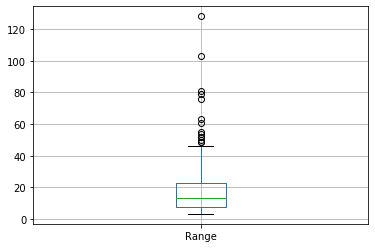

In [53]:
# check the typical range
data[['Range']].boxplot()


In [121]:
typical_range=deal_with_outlirers(data['Range'])
typical_range_df = pd.DataFrame({'Range':typical_range})
# typical_range_df.boxplot()
typical_range_df['Range'].min()

3.2

Crack size to crac technique

In [99]:
crack_width_df = pd.DataFrame(data=np.array([[12.7, 34.3],
                                             [34.3, 63.5],
                                             [63.5, 95.3],
                                             [95.3, 304.8]]),
                              index = ['Fingers','Hands','Fists','OFF'],
                              columns = ['min','max'])
crack_width_df = crack_width_df.T

12.7

In [126]:
output_file("../plots/CAMSWEIGHT_joined.html")
y = [(brand, model,size) for brand,model,size in zip(data.Brand.values,data.Entity.values,data.Size.values)]

source = ColumnDataSource(data = dict(y=y,Lower=data.Lower,Upper=data.Upper,weight=data.Weight))


p = figure(y_range=FactorRange(*y), plot_height=650,plot_width=1200,
           title="CAMS COMPARASION")


# CRAC SIZE BOX 
fingers_box = BoxAnnotation(left=crack_width_df.Fingers['min'], right=crack_width_df.Fingers['max'], fill_color='blue', fill_alpha=0.1)
hands_box = BoxAnnotation(left=crack_width_df.Hands['min'], right=crack_width_df.Hands['max'], fill_color='blue', fill_alpha=0.13)
fists_box = BoxAnnotation(left=crack_width_df.Fists['min'], right=crack_width_df.Fists['max'], fill_color='blue', fill_alpha=0.16)
off_box = BoxAnnotation(left=crack_width_df.OFF['min'], right=crack_width_df.OFF['max'], fill_color='blue', fill_alpha=0.19)
p.add_layout(fingers_box)
p.add_layout(hands_box)
p.add_layout(fists_box)
p.add_layout(off_box)
toggle1 = Toggle(label="Finger size", button_type="success", active=True)
toggle2 = Toggle(label="Hands size", button_type="success", active=True)
toggle3 = Toggle(label="Fists size", button_type="success", active=True)
toggle4 = Toggle(label="OFF size", button_type="success", active=True)
toggle1.js_link('active', fingers_box, 'visible')
toggle2.js_link('active', hands_box, 'visible')
toggle3.js_link('active', fists_box, 'visible')
toggle4.js_link('active', off_box, 'visible')


p.hbar(y='y',left='Lower',right='Upper',height=0.5,source=source,color='green', alpha=0.8,muted_color='green', muted_alpha=0.1,legend_label = 'RANGE')
p.hbar(y='y', right='weight', height=0.1, source=source,color='red', alpha=0.8,muted_color='red', muted_alpha=0.1,legend_label = 'WEIGHT')
p.circle(y=data_weight.index,x=data_weight.values,color='red', alpha=0.8,muted_color='red', muted_alpha=0.1,legend_label='NORM SET WEIGHT')
p.legend.click_policy="hide"
show(layout([p],
            [toggle1,toggle2,toggle3,toggle4])
    )

TESTS